<a href="https://colab.research.google.com/github/surajgazi100/Data_science_/blob/main/Relational_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relational algebra
Relational algebra is a theory for manipulating data that's in table form, which is perfect because a DataFrame is a table! We use relational algebra to define the operations on tables; operations that can be  grouped into 5 main categories:

1.Projection and restriction

2.Set operations (union, difference, intersection)

3.Cartesian product

4.Join

5.Aggregation

**Pandas data structures**

Pandas has two fundamental data structures, the  Series  and the  DataFrame  . These structures can be seen as a generalization of NumPy's tables and matrices.

The key difference between these and NumPy's versions is that Pandas' objects have explicit indexes. Where an element of a NumPy array can only be referred to by its position in the array, each element of a  Series  or  DataFrame  can have an index explicitly designated by the user.

In [1]:
import numpy as np
import pandas as pd
# We can create a series from a lit
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("data looks like a numpy array: ", data)

# We can manually specify indexes
data = pd.Series([0.25, 0.5, 0.75, 1.0],        
                index=['a', 'b', 'c', 'd'])
print("data looks like a Python dict: ", data)

print(data['b'])
# We can create a Series directly from a dict:
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,               
                    'Florida': 19552860,                  
                    'Illinois': 12882135}
area_dict = {'California': 423967,
            'Texas': 695662,
            'New York': 141297,
            'Florida': 170312,
            'Illinois': 149995}

population = pd.Series(population_dict)
area = pd.Series(area_dict)
print(population)
# What do you think of this line?
print(population['California':'Florida'])

data looks like a numpy array:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
data looks like a Python dict:  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


DataFrames  allow you to combine several  Series  into columns, much like in an SQL table. Building a  DataFrame  is easy:



In [2]:
# From a Series
df = pd.DataFrame(population, columns=['population'])
print(df)

# From a list of dict
data = [{'a': i, 'b': 2 * i} for i in range(3)]
df = pd.DataFrame(data)
print(df)

# From several Series
df = pd.DataFrame({'population': population,
                    'area': area})
print(df)

# From a 2-dimensional Numpy array
df = pd.DataFrame(np.random.rand(3, 2),
                columns=['foo', 'bar'],
                index=['a', 'b', 'c'])
print(df)

# A function to easily generate DataFrames. It will be very 
# useful in the rest of this chapter.
def make_df(cols, ind):    
    """Quickly create DataFrames"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)
    
# example
make_df('ABC', range(3))

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
   a  b
0  0  0
1  1  2
2  2  4
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
        foo       bar
a  0.120152  0.870381
b  0.255826  0.642100
c  0.762551  0.659219


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


Projection and restriction
The first 2 operations of relational algebra are very simple. Projection is a selection of certain columns and restriction is a selection of certain rows.

We can refer to the elements of the Pandas objects by using either their implicit indexes (like we do with Numpy arrays) or explicit indexes (as in the dicts). To avoid confusion, it is advisable to use the  loc  (which refers by index) and  iloc  (which refers by position) attributes of each object.

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a', 'b', 'c', 'd'])
print(data)

print(data.loc['b'])
print(data.iloc[1])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
0.5


The difference between the two should be clear after executing these lines. We perform these same operations on  DataFrames  in a similar way:

In [4]:
data = pd.DataFrame({'area':area, 'pop':population})
print(data)
data.loc[:'Illinois', :'pop']

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Another very useful function to manipulate Dataframes is  pd.merge, which allows you to join DataFrames.

A join is assembles information from one table A with that from another table B according to a chosen criterion. This criterion is called the join condition. This condition is composed of one or more columns that are common to A and B.

Here is a quick example to help explain. Let's imagine that we have two Dataframes:

df1  containing a list of employees and the names of the departments in which they work,

df2  containing the same list of employees and their dates of entry into the company.

The  pd.merge  function allows us to transform these two Dataframes into one, containing both information.

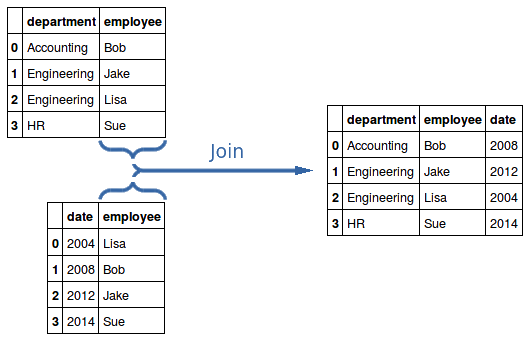

In [5]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'department': ['Accounting','Engineering','Engineering', 'HR']})
                    
df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'date': [2004, 2008, 2012, 2014]})
    
df3 = pd.merge(df1, df2)